In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline

In [3]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


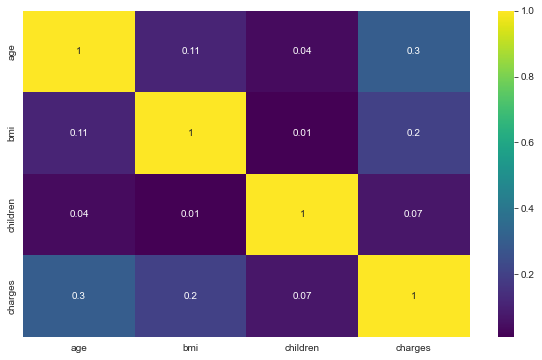

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
plt.show()

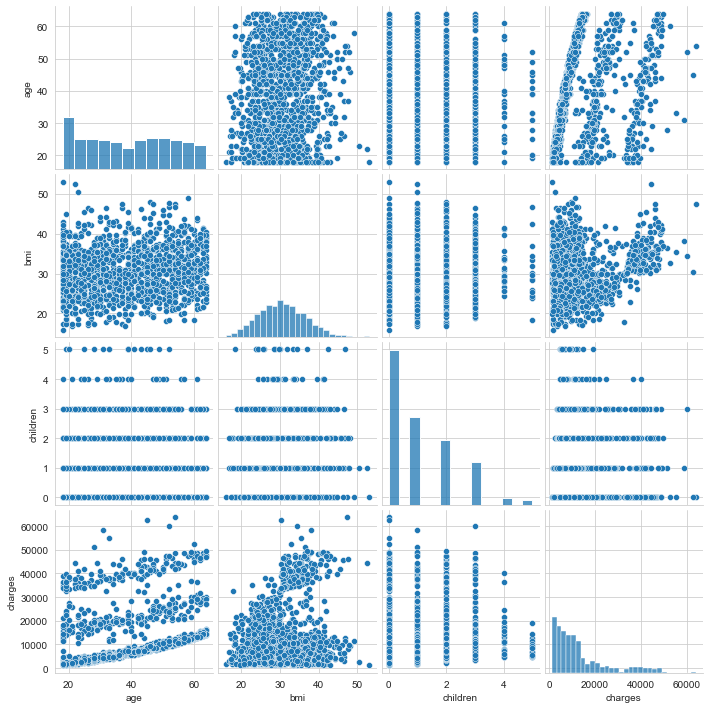

In [15]:
sns.pairplot(df)
plt.show()

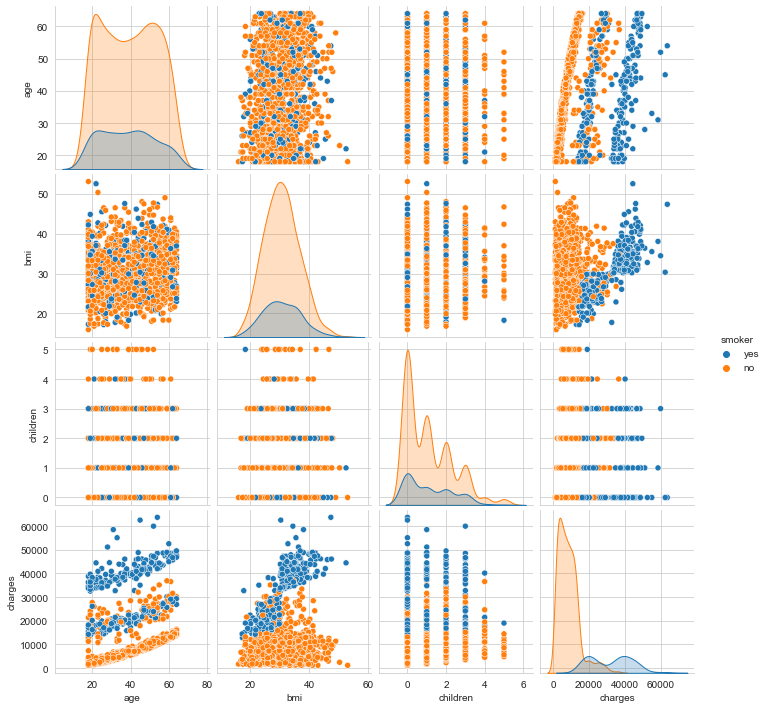

In [19]:
sns.pairplot(df, hue='smoker')
plt.show()

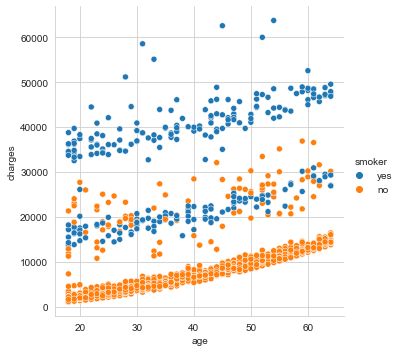

In [20]:
sns.relplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

In [22]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [25]:
filter = df['smoker'] == 'no'
df_non_smokers = df[filter]
df_non_smokers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


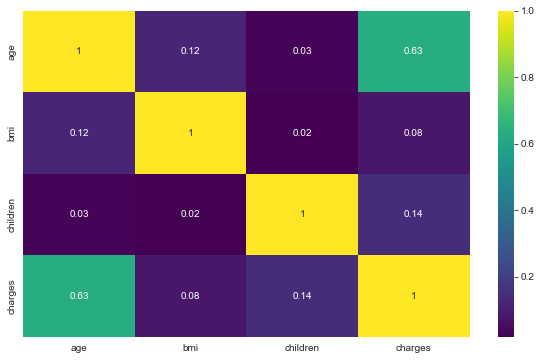

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_non_smokers.corr().round(2), annot=True, cmap='viridis')
plt.show()

## Regresión simple

In [35]:
X = df_non_smokers[['age']]
X.ndim

2

In [36]:
y = df_non_smokers['charges']
y.ndim

1

In [27]:
model = LinearRegression()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [43]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.4392
mae:  2518.6883


## Regresión múltiple

In [44]:
X = df_non_smokers[['age', 'bmi', 'children']] # input
y = df_non_smokers['charges'] # output

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.448
mae:  2466.2957


## Crear una nueva feature de entrada

In [49]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [48]:
# Transformación de la variable smoker de categórico a numérico
df['smoker'].map({
    'yes': 1,
    'no': 0
})

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [51]:
df['smoker_int'] = df['smoker'].map({
    'yes': 1,
    'no': 0
})
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_int
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [53]:
X = df[['age', 'bmi', 'children', 'smoker_int']] # input
y = df['charges'] # output

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.7654
mae:  4265.9518


In [59]:
coefficients = model.coef_
coefficients

array([  260.00849987,   327.57844442,   435.24021194, 23632.63999974])

In [60]:
intercept = model.intercept_
intercept

-12268.326378050348

In [61]:
def calculate_charges(age, bmi, children, smoker):
    return (age * coefficients[0]) + (bmi * coefficients[1]) + (children * coefficients[2]) + (smoker * coefficients[3]) + intercept

In [62]:
print(calculate_charges(19, 27.90, 0, 1))

25443.91371848176


In [63]:
model.predict([[19, 27.90, 0, 1]])

C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25443.91371848])